## Video Face Extractor

This notebook shows how to use the tools for extracting faces and faces features from a given video, based on pyannote features.
This notebook is based on pyannote's getting started notebook: https://nbviewer.jupyter.org/github/pyannote/pyannote-video/blob/master/doc/getting_started.ipynb.

### Installation

Start by creating a `conda` environment based on the given env file:

```bash
$ conda env create -f environment.yml
$ conda activate face_extractor
```
Download `dlib` models (into the directory of this project):

```bash
$ bunzip2 dlib-models/dlib_face_recognition_resnet_model_v1.dat.bz2
$ bunzip2 dlib-models/shape_predictor_68_face_landmarks.dat.bz2
```

To execute this notebook locally:
```bash
$ jupyter notebook video_face_extractor.ipynb
```


### Settings

Choose the video to work with, and the directory in which the video is in. The data of the scrips will be written to this directory as well.

In [1]:
episode_name = "TheBigBangTheory"
episode_suffix = "mkv"
episode_file = f"{episode_name}.{episode_suffix}"
data_directory = "data"

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
!python -V

Python 3.6.10 :: Anaconda, Inc.


#### Setting script path to avoid module loading error

In [ ]:
conda info -e

Set the env_path to be the one that is marked in the previous command, and set the script path. This will enable now running scripts from the scripts directory without loading modules errors.

In [4]:
from os import path
env_path = # Enter the path here!
script_path = path.join(env_path, 'Scripts')

### Shot segmentation

In [5]:
%run {script_path}\pyannote-structure.py --help

Video structure

The standard pipeline for is the following:

    shot boundary detection ==> shot threading ==> segmentation into scenes

Usage:
  pyannote-structure.py shot [options] <video> <output.json>
  pyannote-structure.py thread [options] <video> <shot.json> <output.json>
  pyannote-structure.py scene [options] <video> <thread.json> <output.json>
  pyannote-structure.py (-h | --help)
  pyannote-structure.py --version

Options:
  --ffmpeg=<ffmpeg>      Specify which `ffmpeg` to use.
  --height=<n_pixels>    Resize video frame to height <n_pixels> [default: 50].
  --window=<n_seconds>   Apply median filtering on <n_seconds> window [default: 2.0].
  --threshold=<value>    Set threshold to <value> [default: 1.0].
  --min-match=<n_match>  Set minimum number of matches to <n_match> [default: 20].
  --lookahead=<n_shots>  Look at up to <n_shots> following shots [default: 24].
  -h --help              Show this screen.
  --version              Show version.
  --verbose              Sh

In [6]:
%run {script_path}\pyannote-structure.py shot --verbose \
                                      {data_directory}/{episode_file} \
                                      {data_directory}/{episode_name}.shots.json

100%|█████████████████████████████████████████████████████████████████████████████| 752/752 [00:30<00:00, 24.4frames/s]


Detected shot boundaries can be visualized using `pyannote.core` notebook support:

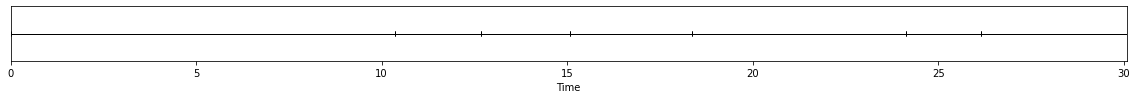

In [7]:
from pyannote.core.json import load_from
shots = load_from(f'{data_directory}/{episode_name}.shots.json')
shots

# Face processing

In [8]:
%run {script_path}\pyannote-face.py --help

Face detection and tracking

The standard pipeline is the following

      face tracking => feature extraction => face clustering

Usage:
  pyannote-face track [options] <video> <shot.json> <tracking>
  pyannote-face extract [options] <video> <tracking> <landmark_model> <embedding_model> <landmarks> <embeddings>
  pyannote-face demo [options] <video> <tracking> <output>
  pyannote-face (-h | --help)
  pyannote-face --version

General options:

  --ffmpeg=<ffmpeg>         Specify which `ffmpeg` to use.
  -h --help                 Show this screen.
  --version                 Show version.
  --verbose                 Show processing progress.

Face tracking options (track):

  <video>                   Path to video file.
  <shot.json>               Path to shot segmentation result file.
  <tracking>                Path to tracking result file.

  --min-size=<ratio>        Approximate size (in video height ratio) of the
                            smallest face that should be detected. D

<Figure size 432x288 with 0 Axes>

### Face tracking

In [9]:
%run {script_path}\pyannote-face.py track --verbose {data_directory}/{episode_file} \
                                      {data_directory}/{episode_name}.shots.json \
                                      {data_directory}/{episode_name}.track.txt

100%|█████████████████████████████████████████████████████████████████████████████| 752/752 [03:05<00:00, 4.05frames/s]


Face tracks can be visualized using `demo` mode:

In [10]:
%run {script_path}\pyannote-face.py demo {data_directory}/{episode_file}\
    {data_directory}/{episode_name}.track.txt \
    {data_directory}/{episode_name}.track.mp4

[MoviePy] >>>> Building video data/TheBigBangTheory.track.mp4
[MoviePy] Writing audio in TheBigBangTheory.trackTEMP_MPY_wvf_snd.mp3


100%|███████████████████████████████████████████████████████████████████████████████| 664/664 [00:01<00:00, 425.74it/s]

[MoviePy] Done.
[MoviePy] Writing video data/TheBigBangTheory.track.mp4



100%|███████████████████████████████████████████████████████████████████████████████▉| 752/753 [00:07<00:00, 95.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: data/TheBigBangTheory.track.mp4 



In [11]:
import io
import base64
from IPython.display import HTML
video = io.open(f'{data_directory}/{episode_name}.track.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii')))

### Facial landmarks and face embedding

In [12]:
%run {script_path}/pyannote-face.py extract -h

Face detection and tracking

The standard pipeline is the following

      face tracking => feature extraction => face clustering

Usage:
  pyannote-face track [options] <video> <shot.json> <tracking>
  pyannote-face extract [options] <video> <tracking> <landmark_model> <embedding_model> <landmarks> <embeddings>
  pyannote-face demo [options] <video> <tracking> <output>
  pyannote-face (-h | --help)
  pyannote-face --version

General options:

  --ffmpeg=<ffmpeg>         Specify which `ffmpeg` to use.
  -h --help                 Show this screen.
  --version                 Show version.
  --verbose                 Show processing progress.

Face tracking options (track):

  <video>                   Path to video file.
  <shot.json>               Path to shot segmentation result file.
  <tracking>                Path to tracking result file.

  --min-size=<ratio>        Approximate size (in video height ratio) of the
                            smallest face that should be detected. D

In [13]:
%run {script_path}/pyannote-face.py extract --verbose {data_directory}/{episode_file} {data_directory}/{episode_name}.track.txt \
                                    dlib-models/shape_predictor_68_face_landmarks.dat \
                                    dlib-models/dlib_face_recognition_resnet_model_v1.dat \
                                    {data_directory}/{episode_name}.landmarks.txt \
                                    {data_directory}/{episode_name}.embedding.txt

100%|█████████████████████████████████████████████████████████████████████████████| 752/752 [10:28<00:00, 1.20frames/s]


### Face clustering

Once embeddings are extracted, we can apply face track hierarchical agglomerative clustering.  
The distance between two clusters is defined as the average euclidean distance between all embeddings. 
The following script clusters the tracks to identities based on the given embedding files. If the video file is large, and there are a lot of face, I recommend splitting the embedding files to chuncks, by using the --max flag. Each chunk will be clustered separatly and you'll need to label more tracks, but the clustering will be finished much faster.

Notice: make sure the frames dir exists, and the faces will be extracted to it.

In [14]:
%run cluster_and_label -h

usage: cluster_and_label.py [-h] [--clusters_path [clusters_path]]
                            [--load_cached] [--episode [episode]]
                            [--suffix [suffix]] [--data_dir [data_dir]]
                            [--frames_dir [frames]]
                            [--embedding_path [embedding_path]]
                            [--tracks_path [tracks]] [--labels_path [labels]]
                            [--max [max_tracks]]

optional arguments:
  -h, --help            show this help message and exit
  --clusters_path [clusters_path]
                        the path of the clustering results
  --load_cached         load existing clustering results, useful for
                        relabeling
  --episode [episode]   the name of the episode
  --suffix [suffix]     the name of the episode
  --data_dir [data_dir]
                        the path of the datat directory
  --frames_dir [frames]
                        the path of the datat directory
  --embedding_path [em

Next merging candidates are 9 6 with (similarity = -0.399479).
Next merging candidates are 16 11 with (similarity = -0.437396).
Next merging candidates are 17 1 with (similarity = -0.44229).
Next merging candidates are 8 17 with (similarity = -0.476131).
Next merging candidates are 8 14 with (similarity = -0.485495).
Next merging candidates are 7 4 with (similarity = -0.495178).
Next merging candidates are 15 12 with (similarity = -0.498108).
Next merging candidates are 8 10 with (similarity = -0.500085).
Next merging candidates are 8 5 with (similarity = -0.531788).
Next merging candidates are 16 13 with (similarity = -0.54659).
Next merging candidates are 15 0 with (similarity = -0.551884).
Next merging candidates are 7 15 with (similarity = -0.570263).
Next merging candidates are 7 3 with (similarity = -0.57751).
Next merging candidates are 8 2 with (similarity = -0.603157).
save clustering result to:  clustering_results.pickle.062820211302
read video file from data/TheBigBangTheory

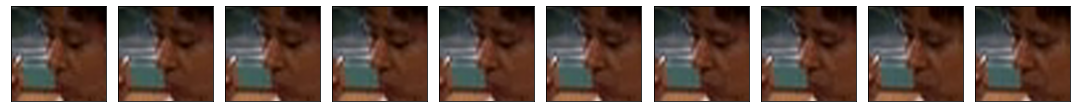

Enter identity name: Receptionist


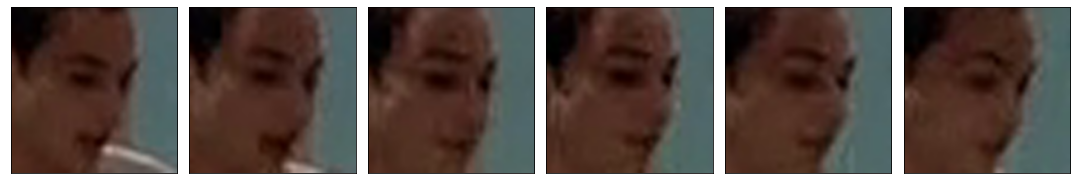

Enter identity name: Sheldon


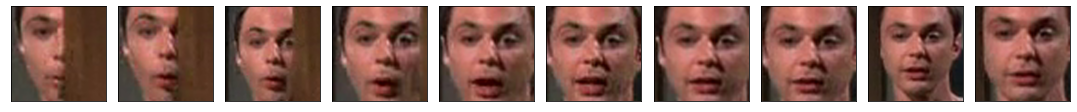

Enter identity name: Sheldon


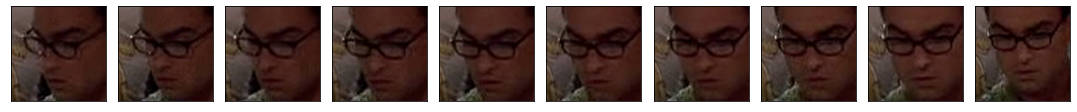

Enter identity name: Leonard


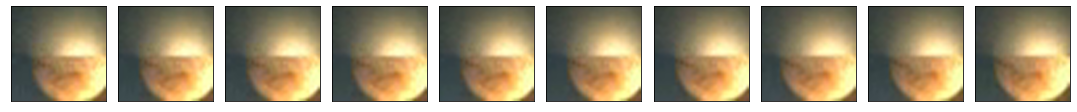

Enter identity name: false_alarm
writing labels to data/TheBigBangTheory.labels.txt


In [15]:
%run cluster_and_label --data_dir {data_directory}  \
                       --episode {episode_name} \
                       --embedding_path {data_directory}/{episode_name}.embedding.txt \
                       --tracks_path {data_directory}/{episode_name}.track.txt \
                       --labels_path {data_directory}/{episode_name}.labels.txt \
                       --suffix {episode_suffix}

Alternatively, we can use directly the clustering of pyannote. You can label the tracks by watching the demo video and match between track number and a face.

In [ ]:
from pyannote.video.face.clustering import FaceClustering
clustering = FaceClustering(threshold=0.6)
face_tracks, embeddings = clustering.model.preprocess('data/{}.embedding.txt'.format(episode_name))
face_tracks.get_timeline()

In [ ]:
result = clustering(face_tracks, features=embeddings)
result

In [ ]:
from pyannote.core import notebook, Segment
notebook.reset()
notebook.crop = Segment(0, 30)
mapping = {8: 'Leonard', 5: 'Sheldon', 9: 'Receptionist', 7: 'False_alarm'}
result = result.rename_labels(mapping=mapping)
result

In [ ]:
with open('{0}/{1}.labels.txt'.format(data_directory, episode_name), 'w') as fp:
    for _, track_id, cluster in result.itertracks(yield_label=True):
        fp.write(f'{track_id} {cluster}\n')

Now, we can watch the video with the labels instead of just track numbers. This would help us make sure that the labeling worked as expected.

In [16]:
%run {script_path}/pyannote-face.py demo {data_directory}/{episode_file} \
                       {data_directory}/{episode_name}.track.txt \
                       --label={data_directory}/{episode_name}.labels.txt \
                       {data_directory}/{episode_name}.final.mp4

[MoviePy] >>>> Building video data/TheBigBangTheory.final.mp4
[MoviePy] Writing audio in TheBigBangTheory.finalTEMP_MPY_wvf_snd.mp3


100%|███████████████████████████████████████████████████████████████████████████████| 664/664 [00:01<00:00, 419.25it/s]

[MoviePy] Done.
[MoviePy] Writing video data/TheBigBangTheory.final.mp4



100%|███████████████████████████████████████████████████████████████████████████████▉| 752/753 [00:08<00:00, 90.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: data/TheBigBangTheory.final.mp4 



In [17]:
import io
import base64
from IPython.display import HTML
video = io.open(f'{data_directory}/{episode_name}.final.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii')))

### Validation step

create excel file with clusters and image of each tracks, to examine the process of tracks extraction and clustering.

In [18]:
%run visualize_clusters.py --episode {episode_name}

writing output to:  data/TheBigBangTheory_clustered.xlsx
labels:  dict_keys(['Sheldon', 'Leonard', 'false_alarm', 'Receptionist'])


### Extracting tracks frames and features

The features extraction is done by using https://github.com/christiansafka/img2vec. Can give different models for extraction.
After the extraction you can use the tracks object as you wish.

In [19]:
%run track_extraction.py -h

usage: track_extraction.py [-h] [--video [video_path]]
                           [--tracks [tracks_path]] [--output [output_path]]
                           [--tracks_output [tracks_output]]
                           [--labels [labels]]
                           [--track_frames_path [track_frames_path]]
                           [--model [model]] [--visualize] [--cuda]
                           [--feature_size FEATURE_SIZE]

optional arguments:
  -h, --help            show this help message and exit
  --video [video_path]  the path of the video
  --tracks [tracks_path]
                        the path of the tracks
  --output [output_path]
                        the output directory
  --tracks_output [tracks_output]
                        the path of the tracks
  --labels [labels]     the path of the labels file
  --track_frames_path [track_frames_path]
                        the path of the labels file
  --model [model]       the model we want to use for feature extraction
  

In [20]:
%run track_extraction.py --video {data_directory}/{episode_file} \
                         --tracks {data_directory}/{episode_name}.track.txt \
                         --labels={data_directory}/{episode_name}.labels.txt \
                         --output {data_directory} \
                         --tracks_output=tracks.data

track extraction input:
	video: data/TheBigBangTheory.mkv
	tracks: data/TheBigBangTheory.track.txt
	labels: data/TheBigBangTheory.labels.txt
track extraction writing output to:
	 data\TheBigBangTheory.tracks.data
track unique labels:  {'Leonard', 'Sheldon', 'Receptionist', 'false_alarm'}
missing tids in labels file: []
skipping track ids:  ['9', '6']
track 0: 5.520 start extracting frames
track 1: 6.360 start extracting frames
track 2: 6.680 start extracting frames
track 3: 7.560 start extracting frames
track 4: 10.360 start extracting frames
track 5: 12.680 start extracting frames
track 7: 15.360 start extracting frames
track 8: 16.240 start extracting frames
track 10: 19.120 start extracting frames
track 11: 21.880 start extracting frames
track 12: 22.640 start extracting frames
track 13: 24.120 start extracting frames
track 14: 26.160 start extracting frames
track 15: 26.160 start extracting frames
track 16: 26.160 start extracting frames
track 14: 26.920 start extracting frames
tra